In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('HousingData.csv')
print('Description:',df.describe())
print("Feature Names:\n", df.columns.tolist())
print("\nShape of Data:", df.shape)
df.head()

Description:              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


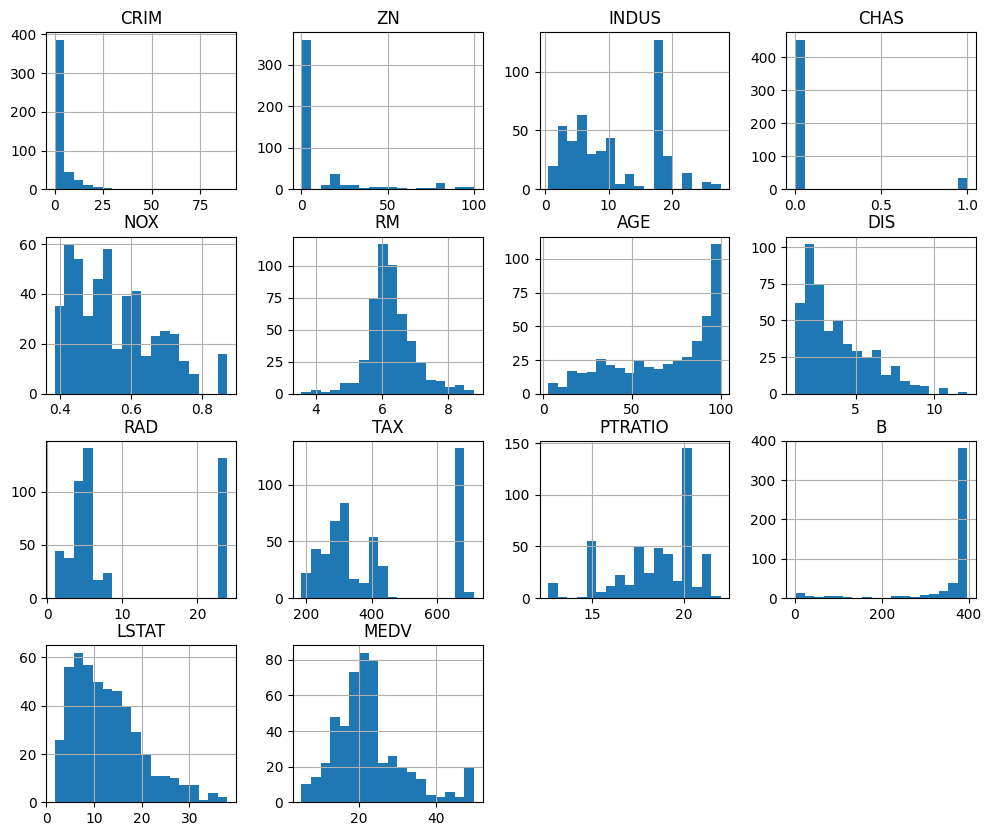

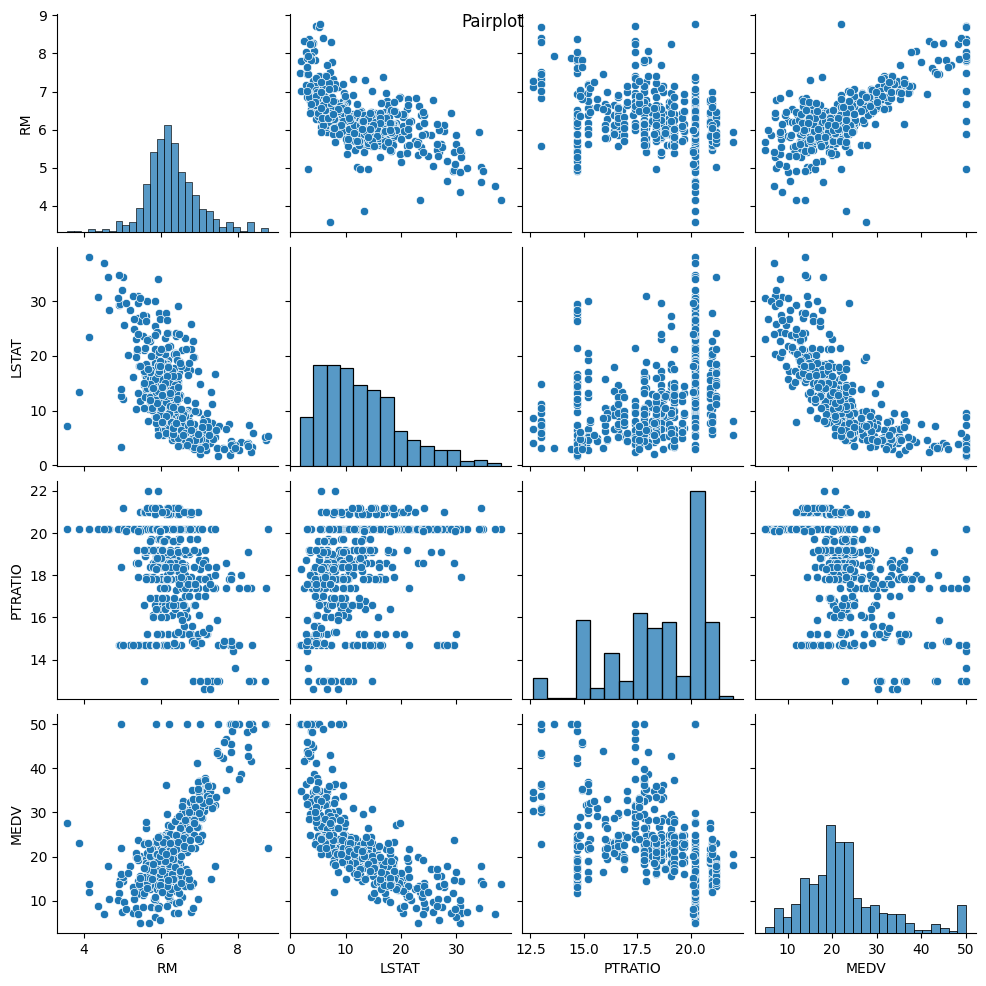

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10),bins=18)
plt.suptitle("Histogram")
plt.show()
s=['RM', 'LSTAT', 'PTRATIO', 'MEDV']
sns.pairplot(df[s])
plt.suptitle("Pairplot")
plt.show()

In [ ]:
corr_mat=df.corr()
print("Correlation matrix with MEDV:\n", corr_mat['MEDV'])

Correlation matrix with MEDV:
 CRIM      -0.391363
ZN         0.373136
INDUS     -0.481772
CHAS       0.181391
NOX       -0.427321
RM         0.695360
AGE       -0.394656
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.735822
MEDV       1.000000
Name: MEDV, dtype: float64


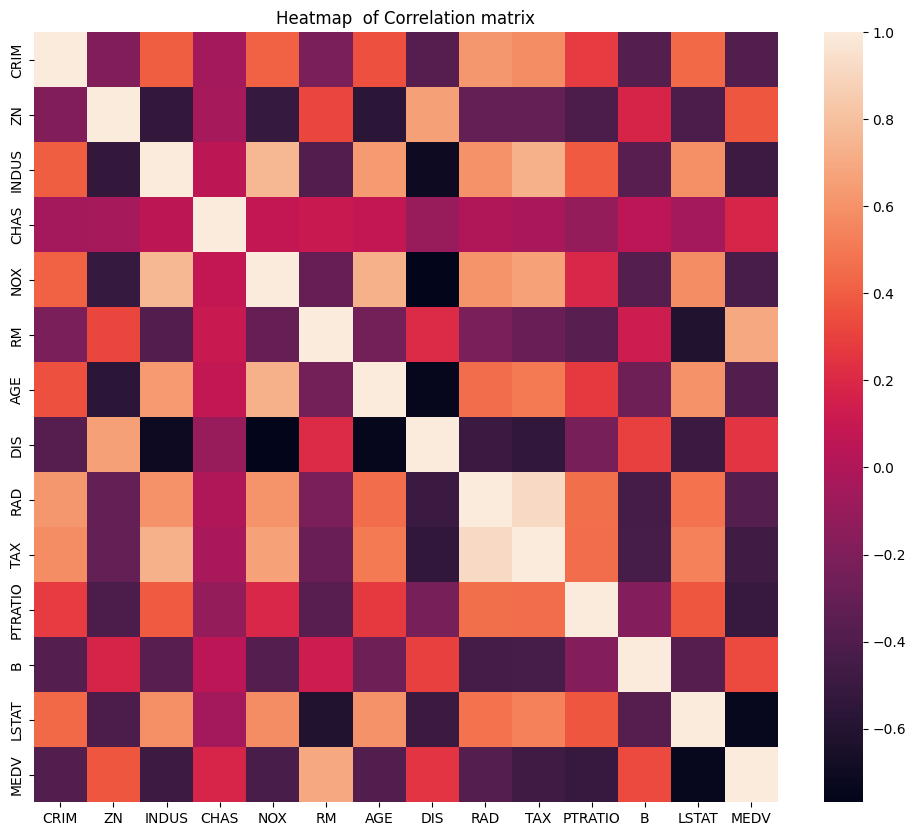

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat)
plt.title("Heatmap  of Correlation matrix")
plt.show()

Mean Squared Error: 44.75080801876693
R² Score:  0.4623909099445648


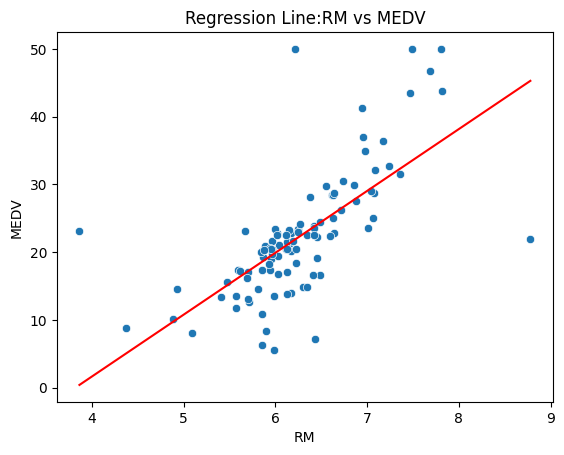

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
x=df[['RM']]
y=df['MEDV']
x_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model=LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:",mse)
print("R square score: ",r2)

sns.scatterplot(x=X_test['RM'], y=y_test)
sns.lineplot(x=X_test['RM'], y=y_pred, color='red')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Regression Line:RM vs MEDV")
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

x = df[['RM']]
y = df['MEDV']
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
residuals = y_test - y_pred
std_error = np.std(residuals)

print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Standard error:", std_error)
print("R sqaure  score:", r2)

Mean squared error: 40.98501247932979
Mean absolute error: 4.37989325161985
Standard error: 6.362444315169613
R sqaure  score: 0.5385839232923848
